In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold, RFECV, SelectFromModel, SelectKBest, f_regression
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
url1 = 'C:/Users/Abdoul-Aziz ZONGO/Downloads/Projet SNCF_avant 14h/load_train.csv'
df= pd.read_csv(url1, index_col=0, encoding = "ISO-8859-1")

url2 = 'C:/Users/Abdoul-Aziz ZONGO/Downloads/Projet SNCF_avant 14h/load_test.csv'
data_testing = pd.read_csv(url2, index_col=0, encoding = "ISO-8859-1")

print('data_training',df.shape)
print('data_testing',data_testing.shape)

data_training (21430, 17)
data_testing (3835, 15)


In [101]:
df.head()

,Jour,Date.de.comptage,Gare,N..de.l.arrêt,Horaire.R,Horaire.T,Durée.T,Durée.R,Tps.échange,Train,Comp.,Rame,Cap..Assis,Cap..totale,Montées,Descentes,Charge
1,lun.,05/03/2018,Gare A,1,05:54:06,05:52:00,NaN,NaN,NaN,1,UM2,166L/152L,760,1452,173,0,173
2,lun.,05/03/2018,Gare B,2,05:55:57,05:54:30,00:00:40,00:00:56,00:00:09,1,UM2,166L/152L,760,1452,6,26,153
3,lun.,05/03/2018,Gare C,3,05:58:14,05:57:20,00:00:40,00:01:19,00:00:12,1,UM2,166L/152L,760,1452,21,42,132
4,lun.,05/03/2018,Gare D,4,06:00:53,06:00:00,00:00:40,00:01:41,00:00:10,1,UM2,166L/152L,760,1452,39,5,166
5,lun.,05/03/2018,Gare E,5,06:06:40,06:05:00,00:01:00,00:01:42,00:00:14,1,UM2,166L/152L,760,1452,93,69,190


In [102]:
data_testing.head()

,Jour,Date.de.comptage,Gare,N..de.l.arrêt,Horaire.R,Horaire.T,Durée.T,Durée.R,Tps.échange,Train,Comp.,Rame,Cap..Assis,Cap..totale,Montées
1,lun.,02/04/2018,Gare A,1,05:52:13,05:50:00,NaN,NaN,NaN,72,US,80L,380,726,46
2,lun.,02/04/2018,Gare B,2,05:54:04,05:52:20,00:00:30,00:00:51,00:00:05,72,US,80L,380,726,2
3,lun.,02/04/2018,Gare C,3,05:56:18,05:54:50,00:00:30,00:00:49,00:00:09,72,US,80L,380,726,5
4,lun.,02/04/2018,Gare D,4,05:58:43,05:57:10,00:00:40,00:01:01,00:00:02,72,US,80L,380,726,2
5,lun.,02/04/2018,Gare M,5,06:04:37,05:59:30,00:00:30,00:01:02,00:00:08,72,US,80L,380,726,8


# EXPLORATION DE DONNEES

In [103]:
print(df.isnull().sum())
#print(data_testing.isnull().sum())

Jour                   0
Date.de.comptage       0
Gare                   0
N..de.l.arrêt          0
Horaire.R             27
Horaire.T              0
Durée.T             3318
Durée.R             3318
Tps.échange         3718
Train                  0
Comp.                  0
Rame                   0
Cap..Assis             0
Cap..totale            0
Montées                0
Descentes              0
Charge                 0
dtype: int64


### Suppression des variables non pertinentes

In [104]:
df = df.drop('Jour', axis = 1)
df = df.drop('Date.de.comptage', axis = 1)
df = df.drop('Horaire.R', axis = 1)
df = df.drop('Horaire.T', axis = 1)
df = df.drop('Durée.T', axis = 1)
df = df.drop('Durée.R', axis = 1)
df = df.drop('Tps.échange', axis = 1)
df = df.drop('Descentes', axis = 1)

In [105]:
data_testing = data_testing.drop('Jour', axis = 1)
data_testing = data_testing.drop('Date.de.comptage', axis = 1)
data_testing = data_testing.drop('Horaire.R', axis = 1)
data_testing = data_testing.drop('Horaire.T', axis = 1)
data_testing = data_testing.drop('Durée.T', axis = 1)
data_testing = data_testing.drop('Durée.R', axis = 1)
data_testing = data_testing.drop('Tps.échange', axis = 1)

In [106]:
df.head()

,Gare,N..de.l.arrêt,Train,Comp.,Rame,Cap..Assis,Cap..totale,Montées,Charge
1,Gare A,1,1,UM2,166L/152L,760,1452,173,173
2,Gare B,2,1,UM2,166L/152L,760,1452,6,153
3,Gare C,3,1,UM2,166L/152L,760,1452,21,132
4,Gare D,4,1,UM2,166L/152L,760,1452,39,166
5,Gare E,5,1,UM2,166L/152L,760,1452,93,190


### Vérification de valeurs manquantes

In [107]:
print(df.isnull().sum())
print(data_testing.isnull().sum())

Gare             0
N..de.l.arrêt    0
Train            0
Comp.            0
Rame             0
Cap..Assis       0
Cap..totale      0
Montées          0
Charge           0
dtype: int64
Gare             0
N..de.l.arrêt    0
Train            0
Comp.            0
Rame             0
Cap..Assis       0
Cap..totale      0
Montées          0
dtype: int64


### Analyse de corrélation

<AxesSubplot:>

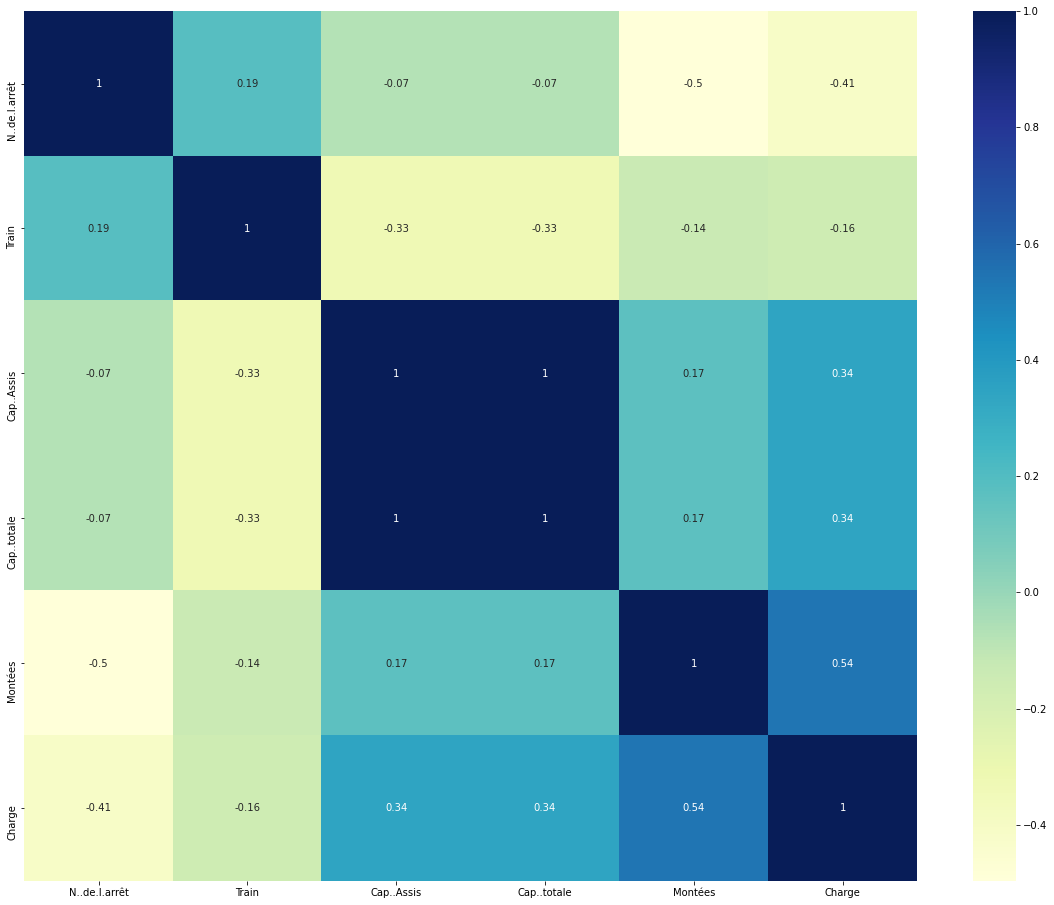

In [108]:
a4_dims = (20, 16)
fig, ax = plt.subplots(figsize=a4_dims)
cor = df.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")

<AxesSubplot:xlabel='Train', ylabel='Charge'>

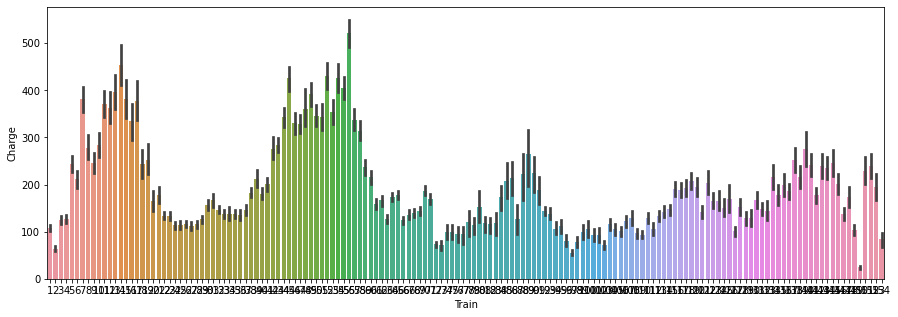

In [109]:
# Analyse de caracteristiques des differentes regions
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = df.Train, y = df.Charge)

# PREPROCESSING

### -> ENCODAGE

In [110]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=scaler.fit_transform(df[col])
        
for col in data_testing.columns:
    if data_testing[col].dtype=='object':
        data_testing[col]=scaler.fit_transform(data_testing[col])

In [111]:
df = pd.get_dummies(df)
data_testing = pd.get_dummies(data_testing)

In [112]:
df.columns

Index(['Gare', 'N..de.l.arrêt', 'Train', 'Comp.', 'Rame', 'Cap..Assis',
       'Cap..totale', 'Montées', 'Charge'],
      dtype='object')

In [114]:
X = df[['Gare', 'N..de.l.arrêt', 'Train', 'Comp.', 'Rame', 'Cap..Assis',
       'Cap..totale', 'Montées']]

y = df['Charge']

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [116]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

### -> NORMALISATION

In [117]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', RobustScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
data_testing = pipeline.transform(data_testing)

# LINEAR REGRESSION

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [20]:
# print the intercept
print(lin_reg.intercept_)

207.34110284239858


In [21]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Gare,9.640741
N..de.l.arrêt,-75.291797
Train,10.080439
Comp.,32.421610
Rame,1.271579
Cap..Assis,50.736914
Cap..totale,50.736914
Montées,25.631114
Descentes,27.396357


In [22]:
pred = lin_reg.predict(X_test)

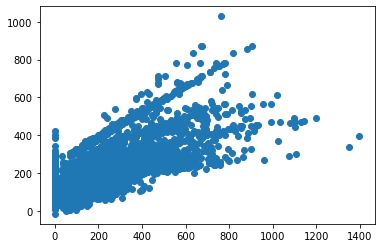

In [23]:
plt.scatter(y_test, pred)

C:\Users\Abdoul-Aziz ZONGO\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



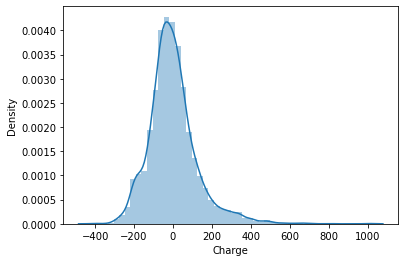

In [24]:
sns.distplot((y_test - pred), bins=50);

In [25]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 90.55748166617448
MSE: 15772.409264645745
RMSE: 125.58825289271981
R2 Square 0.43952543849743764
Train set evaluation:
_____________________________________
MAE: 93.94111307198081
MSE: 16995.51033092992
RMSE: 130.36682987221067
R2 Square 0.4293503433459982


In [26]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,90.557482,15772.409265,125.588253,0.439525,0.399675


# Robust Regression

In [27]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 101.1777923629563
MSE: 27656.396806896126
RMSE: 166.30212508232157
R2 Square 0.01722643554328762
Train set evaluation:
_____________________________________
MAE: 103.28689921433804
MSE: 28754.21504507768
RMSE: 169.57067861242308
R2 Square 0.034534260912004844


In [28]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,90.557482,15772.409265,125.588253,0.439525,0.399675
1,Robust Regression,101.177792,27656.396807,166.302125,0.017226,-0.507898


# Ridge Regression

In [29]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 90.61407941883566
MSE: 15779.243971060707
RMSE: 125.61546071666778
R2 Square 0.4392825663390597
Train set evaluation:
_____________________________________
MAE: 93.93532911963541
MSE: 16999.898786793645
RMSE: 130.38365996854685
R2 Square 0.4292029943824711


In [30]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,90.557482,15772.409265,125.588253,0.439525,0.399675
1,Robust Regression,101.177792,27656.396807,166.302125,0.017226,-0.507898
2,Ridge Regression,90.614079,15779.243971,125.615461,0.439283,0.399727


# LASSO Regression

In [31]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 95.25814892971698
MSE: 17073.94811163398
RMSE: 130.66731845275612
R2 Square 0.39327509067141275
Train set evaluation:
_____________________________________
MAE: 98.85323895040857
MSE: 18407.967738417465
RMSE: 135.67596595719326
R2 Square 0.3819249751795415


In [32]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,90.557482,15772.409265,125.588253,0.439525,0.399675
1,Robust Regression,101.177792,27656.396807,166.302125,0.017226,-0.507898
2,Ridge Regression,90.614079,15779.243971,125.615461,0.439283,0.399727
3,Lasso Regression,95.258149,17073.948112,130.667318,0.393275,0.398461


# Elastic Net

In [33]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 90.68413519253919
MSE: 15790.026346713958
RMSE: 125.65837157433626
R2 Square 0.4388994132541497
Train set evaluation:
_____________________________________
MAE: 93.96519737301223
MSE: 17008.682175793805
RMSE: 130.4173384784163
R2 Square 0.42890807897130645


In [34]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,90.557482,15772.409265,125.588253,0.439525,0.399675
1,Robust Regression,101.177792,27656.396807,166.302125,0.017226,-0.507898
2,Ridge Regression,90.614079,15779.243971,125.615461,0.439283,0.399727
3,Lasso Regression,95.258149,17073.948112,130.667318,0.393275,0.398461
4,Elastic Net Regression,90.684135,15790.026347,125.658372,0.438899,0.396353


# Polynomial Regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 74.8845522227491
MSE: 10786.721943220711
RMSE: 103.85914472602165
R2 Square 0.6166924691252942
Train set evaluation:
_____________________________________
MAE: 76.94613523521646
MSE: 11779.872644287392
RMSE: 108.53512170853908
R2 Square 0.6044731726792072


In [36]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,90.557482,15772.409265,125.588253,0.439525,0.399675
1,Robust Regression,101.177792,27656.396807,166.302125,0.017226,-0.507898
2,Ridge Regression,90.614079,15779.243971,125.615461,0.439283,0.399727
3,Lasso Regression,95.258149,17073.948112,130.667318,0.393275,0.398461
4,Elastic Net Regression,90.684135,15790.026347,125.658372,0.438899,0.396353
5,Polynomail Regression,74.884552,10786.721943,103.859145,0.616692,0.000000


# Stochastic Gradient Descent

In [37]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 90.56416607199904
MSE: 15772.758723674753
RMSE: 125.58964417369273
R2 Square 0.43951302042656715
Train set evaluation:
_____________________________________
MAE: 93.94451516825991
MSE: 16995.529056942298
RMSE: 130.36690169265472
R2 Square 0.4293497145921493


In [38]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,90.557482,15772.409265,125.588253,0.439525,0.399675
1,Robust Regression,101.177792,27656.396807,166.302125,0.017226,-0.507898
2,Ridge Regression,90.614079,15779.243971,125.615461,0.439283,0.399727
3,Lasso Regression,95.258149,17073.948112,130.667318,0.393275,0.398461
4,Elastic Net Regression,90.684135,15790.026347,125.658372,0.438899,0.396353
5,Polynomail Regression,74.884552,10786.721943,103.859145,0.616692,0.000000
6,Stochastic Gradient Descent,90.564166,15772.758724,125.589644,0.439513,0.000000


# Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 29.009067039975115
MSE: 2351.953022509255
RMSE: 48.496938279743546
R2 Square 0.916423051364746
Train set evaluation:
_____________________________________
MAE: 10.867400973268449
MSE: 345.4745255666956
RMSE: 18.58694503049642
R2 Square 0.9884001765431805


In [40]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,90.557482,15772.409265,125.588253,0.439525,0.399675
1,Robust Regression,101.177792,27656.396807,166.302125,0.017226,-0.507898
2,Ridge Regression,90.614079,15779.243971,125.615461,0.439283,0.399727
3,Lasso Regression,95.258149,17073.948112,130.667318,0.393275,0.398461
4,Elastic Net Regression,90.684135,15790.026347,125.658372,0.438899,0.396353
5,Polynomail Regression,74.884552,10786.721943,103.859145,0.616692,0.000000
6,Stochastic Gradient Descent,90.564166,15772.758724,125.589644,0.439513,0.000000
7,Random Forest Regressor,29.009067,2351.953023,48.496938,0.916423,0.000000


# KNN

In [41]:
from sklearn.neighbors import KNeighborsRegressor

kn_reg = KNeighborsRegressor()
kn_reg.fit(X_train, y_train)

test_pred = kn_reg.predict(X_test)
train_pred = kn_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 37.991756105148546
MSE: 3727.821925649401
RMSE: 61.05589181765672
R2 Square 0.8675313755761261
Train set evaluation:
_____________________________________
MAE: 31.8753149790014
MSE: 2852.4317578828077
RMSE: 53.408161903241044
R2 Square 0.9042253411889319


In [42]:
results_df_2 = pd.DataFrame(data=[["KNeighbors Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,90.557482,15772.409265,125.588253,0.439525,0.399675
1,Robust Regression,101.177792,27656.396807,166.302125,0.017226,-0.507898
2,Ridge Regression,90.614079,15779.243971,125.615461,0.439283,0.399727
3,Lasso Regression,95.258149,17073.948112,130.667318,0.393275,0.398461
4,Elastic Net Regression,90.684135,15790.026347,125.658372,0.438899,0.396353
5,Polynomail Regression,74.884552,10786.721943,103.859145,0.616692,0.000000
6,Stochastic Gradient Descent,90.564166,15772.758724,125.589644,0.439513,0.000000
7,Random Forest Regressor,29.009067,2351.953023,48.496938,0.916423,0.000000
8,KNeighbors Regressor,37.991756,3727.821926,61.055892,0.867531,0.000000


## GB

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_reg = GradientBoostingRegressor(random_state=0)
gbr_reg.fit(X_train, y_train)

test_pred = gbr_reg.predict(X_test)
train_pred = gbr_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 39.69492555778108
MSE: 3264.0653572129263
RMSE: 57.13199941550205
R2 Square 0.8840110239910954
Train set evaluation:
_____________________________________
MAE: 40.68900167655973
MSE: 3548.248263280864
RMSE: 59.56717437717576
R2 Square 0.8808622622246616


In [45]:
results_df_2 = pd.DataFrame(data=[["Gradient Boosting Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,90.557482,15772.409265,125.588253,0.439525,0.399675
1,Robust Regression,101.177792,27656.396807,166.302125,0.017226,-0.507898
2,Ridge Regression,90.614079,15779.243971,125.615461,0.439283,0.399727
3,Lasso Regression,95.258149,17073.948112,130.667318,0.393275,0.398461
4,Elastic Net Regression,90.684135,15790.026347,125.658372,0.438899,0.396353
5,Polynomail Regression,74.884552,10786.721943,103.859145,0.616692,0.000000
6,Stochastic Gradient Descent,90.564166,15772.758724,125.589644,0.439513,0.000000
7,Random Forest Regressor,29.009067,2351.953023,48.496938,0.916423,0.000000
8,KNeighbors Regressor,37.991756,3727.821926,61.055892,0.867531,0.000000
9,Gradient Boosting Regressor,39.694926,3264.065357,57.131999,0.884011,0.000000


# Comparaison de modèles

<AxesSubplot:ylabel='Model'>

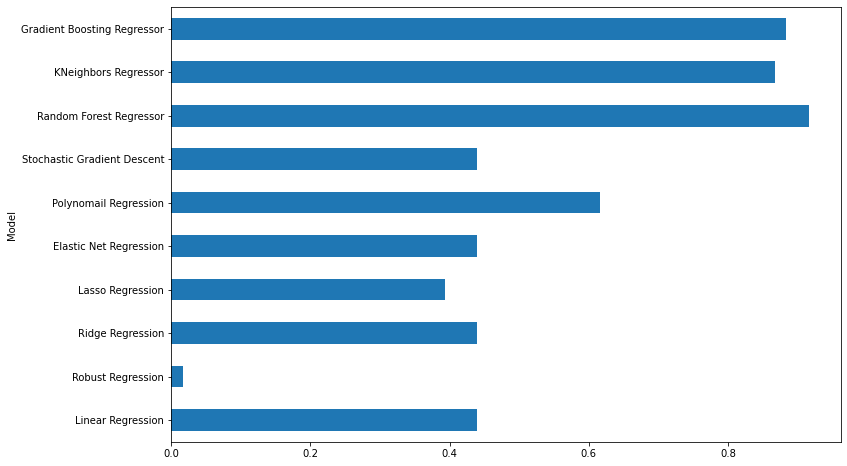

In [46]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

In [119]:
RF = make_pipeline(PolynomialFeatures(),
                   RandomForestRegressor(random_state=0))

In [ ]:
# L'excution du code suivant demande beaucoup de ressource (ça prend énormement de temps)

In [120]:
param_RF={
            'polynomialfeatures__degree': [2, 3, 4],
            'randomforestregressor__max_depth': [2, 3, 4, 5, 10, 15, 20, None],
            'randomforestregressor__n_estimators': (80, 100, 150, 200, 250, 400, 600, 800, 1000),
            'randomforestregressor__max_features': (2, 4, 6,10,12)
        }

grid_RF = GridSearchCV(RF, param_RF, scoring='neg_mean_squared_error', cv=5)

In [121]:
grid_RF.fit(X_train, y_train)
print(grid_RF.best_score_)
print(grid_RF.best_params_)

-2773.0618626328437
{'polynomialfeatures__degree': 2, 'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 12, 'randomforestregressor__n_estimators': 400}


In [122]:
model_RF = grid_RF.best_estimator_
print(model_RF.score(X_train, y_train))
print(model_RF.score(X_test, y_test))

0.9857873367372632
0.9181863398626873


In [124]:
y_pred=model_RF.predict(X_pred)

In [125]:
y_pred

array([ 49.10666667, 121.59505027, 116.64519357, ...,  42.83      ,
        38.97625   ,   0.        ])

In [126]:
y_pred1 = pd.DataFrame(y_pred, columns = ['charge'])
#y_pred1.to_csv('C:/Users/Abdoul-Aziz ZONGO/Downloads/Projet SNCF_avant 14h/Predict1.csv')

In [127]:
y_pred1

,charge
0,49.106667
1,121.595050
2,116.645194
3,144.757087
4,129.937688
...,...
3830,104.840417
3831,70.972500
3832,42.830000
3833,38.976250
